Multi-linear Regression Modal

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
df = pd.read_csv('50_Startups.csv')
df.head()

In [ ]:
df.info()

In [ ]:
df1=pd.get_dummies(df,columns=['State'])
df1.head()

In [ ]:
df1.rename(columns= {'Marketing Spend':'Marketing_Spend','R&D Spend':'R_D_Spend','State_New York':'State_New_York'}, inplace=True)

In [ ]:
df1.head()

In [ ]:
df1.isna().sum()

In [ ]:
## Correlation Matrix
df1.corr()

In [ ]:
# Scatterplot between variables along with histogram
sns.set_style(style='darkgrid')
sns.pairplot(df1)

Preparing Model


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
model = smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend+State_California+State_Florida+State_New_York',data=df1).fit()

In [ ]:
model.params

In [ ]:
# P Values
model.pvalues

In [ ]:
# R Square 
(model.rsquared,model.rsquared_adj)

Simple Linear Regression Models

In [ ]:
ml_r =smf.ols('Profit~R_D_Spend',data= df1).fit()
# P Value
print (ml_r.pvalues)

In [ ]:
ml_a=smf.ols('Profit~Administration',data=df1).fit()
print(ml_a.pvalues)

In [ ]:
ml_m=smf.ols('Profit~Marketing_Spend',data=df1).fit()
print(ml_m.pvalues)

In [ ]:
ml_s=smf.ols('Profit~State_California',data=df1).fit()
print(ml_s.pvalues)

In [ ]:
ml_s=smf.ols('Profit~State_New_York',data=df1).fit()
print(ml_s.pvalues)

In [ ]:
ml_s=smf.ols('Profit~State_Florida',data=df1).fit()
print(ml_s.pvalues)

Q Q PLot Test

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model.resid<-10000))

Calculating VIF

In [ ]:

rsq_rd = smf.ols('R_D_Spend~Profit+Administration+Marketing_Spend+State_California+State_Florida+State_New_York',data=df1).fit().rsquared  
vif_rd = 1/(1-rsq_rd)
rsq_ad = smf.ols('Administration~Profit+R_D_Spend+Marketing_Spend+State_California+State_Florida+State_New_York',data=df1).fit().rsquared  
vif_ad = 1/(1-rsq_ad)
rsq_ms = smf.ols('Marketing_Spend~Profit+R_D_Spend+Administration+State_California+State_Florida+State_New_York',data=df1).fit().rsquared  
vif_ms = 1/(1-rsq_ms)
rsq_sc = smf.ols('State_California~Profit+R_D_Spend+Administration+Marketing_Spend+State_Florida+State_New_York',data=df1).fit().rsquared  
vif_sc = 1/(1-rsq_sc)
rsq_sf = smf.ols('State_Florida~Profit+R_D_Spend+Administration+Marketing_Spend+State_California+State_New_York',data=df1).fit().rsquared  
vif_sf = 1/(1-rsq_sf)
rsq_sny = smf.ols('State_New_York~Profit+R_D_Spend+Administration+Marketing_Spend+State_California+State_Florida',data=df1).fit().rsquared  
vif_sny = 1/(1-rsq_sny)

In [ ]:
# Storing vif values in a data frame
d1 = {'Variables':['R_D_Spend','Administration','Marketing_Spend','State_California','State_Florida','State_New_York'],'VIF':[vif_rd,vif_ad,vif_ms,vif_sc,vif_sf,vif_sny]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame # If Values are more than 20 then we reject those variables

In [ ]:
## No Variable has Value> 20 so there's no collinearity, so consider all Variables.

Residual Plot for Homoscedacity

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Detecting Influenccers

In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

HIgh Influence Point

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
k = df1.shape[1]
n = df1.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [ ]:
leverage_cutoff

In [ ]:
df1[df1.index.isin([49])]

# Improvising The Model
```



In [ ]:
#Load the data
df_new = df1.copy()
df_new

In [ ]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df2=df_new.drop(df_new.index[[49]],axis=0).reset_index()
df2.tail()

# Again Build the Model

In [ ]:
final_model= smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend+State_California+State_Florida+State_New_York',data=df2).fit()

In [ ]:
final_model.rsquared,final_model.aic
print('The final rsquare value is',final_model.rsquared)

In [ ]:
df2.head()

# Model Prediction 

In [ ]:
df3= pd.DataFrame({'R_D_Spend':258689.12,'Administration':959943.78,'Marketing_Spend':932602.24,'State_California':1,'State_Florida':0,'State_New_York':0}, index=[0])
df3

In [ ]:
final_model.predict(df3)

# Final Model Prediction

In [ ]:
pred_y=final_model.predict(df2)
pred_y

# Assign 2 - Toyota Corolla 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.regressionplots
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
Data = pd.read_csv("ToyotaCorolla.csv", encoding='latin1')
Data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [ ]:
Data.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

## ***Drop Following Columns***

In [ ]:
Data.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'],axis = 1, inplace = True)

In [ ]:
Data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


## Correlation Matrix

In [ ]:
Data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


## Scatter Plot Between Variables With their Histogram

In [ ]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(Data)

#Preparing the Model

In [ ]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=Data).fit()

In [ ]:
#Coefficients 
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [ ]:
# P Values
print(model.pvalues)

Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [ ]:
#R Squared Values
(model.rsquared, model.rsquared_adj)

(0.8637627463428191, 0.8629989775766962)

#Simple Regression Models

In [ ]:
# P Value
ml_r =smf.ols('Price~Age_08_04',data= Data).fit()
print (ml_r.pvalues)

Intercept    0.0
Age_08_04    0.0
dtype: float64


In [ ]:
# P Value
ml_r =smf.ols('Price~KM',data= Data).fit()
print (ml_r.pvalues)

Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64


In [ ]:
# P Value
ml_r =smf.ols('Price~HP',data= Data).fit()
print (ml_r.pvalues)

Intercept    1.725695e-06
HP           1.926234e-34
dtype: float64


In [ ]:
# P Value
ml_r =smf.ols('Price~cc',data= Data).fit()
print (ml_r.pvalues)

Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [ ]:
# P Value
ml_r =smf.ols('Price~Doors',data= Data).fit()
print (ml_r.pvalues)

Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [ ]:
# P Value
ml_r =smf.ols('Price~Gears',data= Data).fit()
print (ml_r.pvalues)

Intercept    0.069804
Gears        0.016775
dtype: float64


In [ ]:
# P Value
ml_r =smf.ols('Price~Quarterly_Tax',data= Data).fit()
print (ml_r.pvalues)

Intercept        1.532168e-246
Quarterly_Tax     4.407393e-17
dtype: float64


In [ ]:
# P Value
ml_r =smf.ols('Price~Weight',data= Data).fit()
print (ml_r.pvalues)

Intercept     1.739508e-80
Weight       1.630487e-130
dtype: float64


#Check for Collinearity

#Calculating VIF

In [ ]:
rsq_Age_08_04 = smf.ols('Age_08_04~Price+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Data).fit().rsquared  
vif_Age_08_04 = 1/(1-rsq_rd)

rsq_KM = smf.ols('KM~Price+Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Data).fit().rsquared  
vif_KM = 1/(1-rsq_rd)

rsq_HP = smf.ols('HP~Price+Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=Data).fit().rsquared  
vif_HP = 1/(1-rsq_rd)

rsq_cc = smf.ols('cc~Price+Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=Data).fit().rsquared  
vif_cc = 1/(1-rsq_rd)

rsq_Doors = smf.ols('Doors~Price+Age_08_04+KM+cc+HP+Gears+Quarterly_Tax+Weight',data=Data).fit().rsquared  
vif_Doors = 1/(1-rsq_rd)

rsq_Gears = smf.ols('Gears~Price+Age_08_04+KM+cc+Doors+HP+Quarterly_Tax+Weight',data=Data).fit().rsquared  
vif_Gears = 1/(1-rsq_rd)

rsq_Quarterly_Tax = smf.ols('Quarterly_Tax~Price+Age_08_04+KM+cc+Doors+Gears+HP+Weight',data=Data).fit().rsquared  
vif_Quarterly_Tax = 1/(1-rsq_rd)

rsq_Weight = smf.ols('Weight~Price+Age_08_04+KM+cc+Doors+Gears+HP+Quarterly_Tax',data=Data).fit().rsquared  
vif_Weight = 1/(1-rsq_rd)

In [ ]:
# Storing vif values in a data frame
d1 = {'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_Age_08_04,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Quarterly_Tax,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame # If Values are more than 20 then we reject those variables

,Variables,VIF
0,Age_08_04,2.961102
1,KM,2.961102
2,HP,2.961102
3,cc,2.961102
4,Doors,2.961102
5,Gears,2.961102
6,Quarterly_Tax,2.961102
7,Weight,2.961102


In [ ]:
#As None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

#Residual Analysis

#Test For Normality of Residuals Q-Q Plot

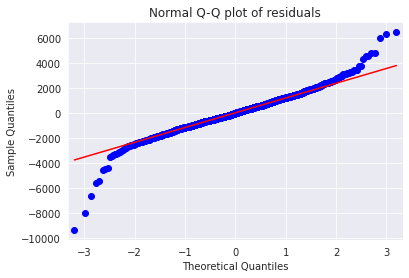

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model.resid>6000))

[array([147, 523])]

In [ ]:
list(np.where(model.resid<-6000))

[array([221, 601, 960])]

## Residual Plot for Homoscedasticity

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

#Residual Vs Regressor

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

#Model Deletion Diagnostic

##Detecting Influencers / Outliers

##Cook's Distance

In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


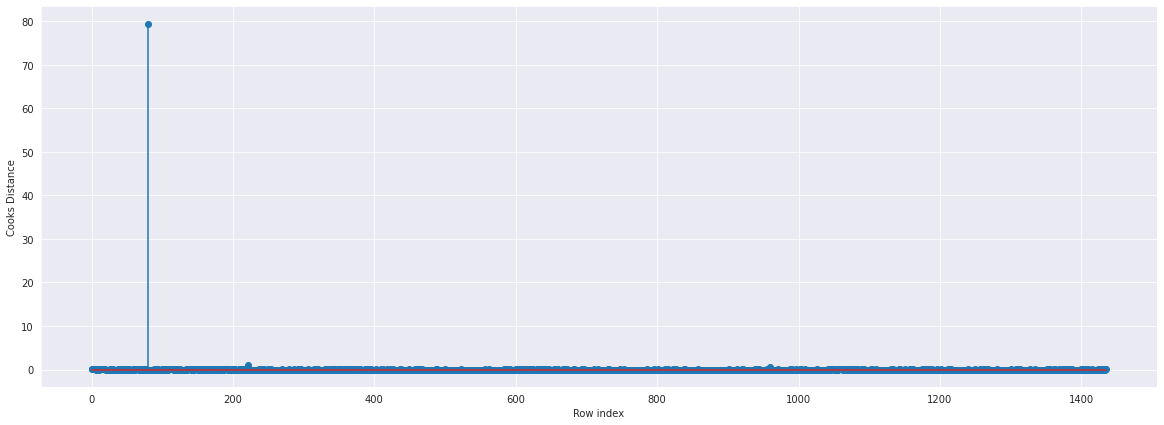

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.52010624141955)

#High Influence Point

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
k = Data.shape[1]
n = Data.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [ ]:
leverage_cutoff

0.020891364902506964

In [ ]:
##From the above plot, it is evident that point 80 is the influencer
Data[Data.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


##Improving the Model

In [150]:
Data_new = pd.read_csv('ToyotaCorolla.csv', encoding = 'latin1', index_col=0)
Data_new

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,Blue,...,1,1,1,0,1,1,1,0,0,0
1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,Grey,...,0,0,1,0,0,1,1,0,0,0
1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,Blue,...,0,0,1,0,0,0,1,0,0,0


In [151]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
Data_2 = Data_new.drop(Data_new.index[[80]],axis=0).reset_index(drop=True)
Data_2.head()

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0


In [153]:
Data_2.drop(['Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'],axis = 1, inplace = True)

In [158]:
Data_2.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [156]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [157]:
Data_2.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

#Model Deletion And Diagnostic

In [160]:
#Build Model
final_price= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=Data_2).fit()

In [164]:
final_price.rsquared

0.8693790488655819

#Cook's Distance

In [166]:
model_influence_V = final_price.get_influence()
(c_V, _) = model_influence_V.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


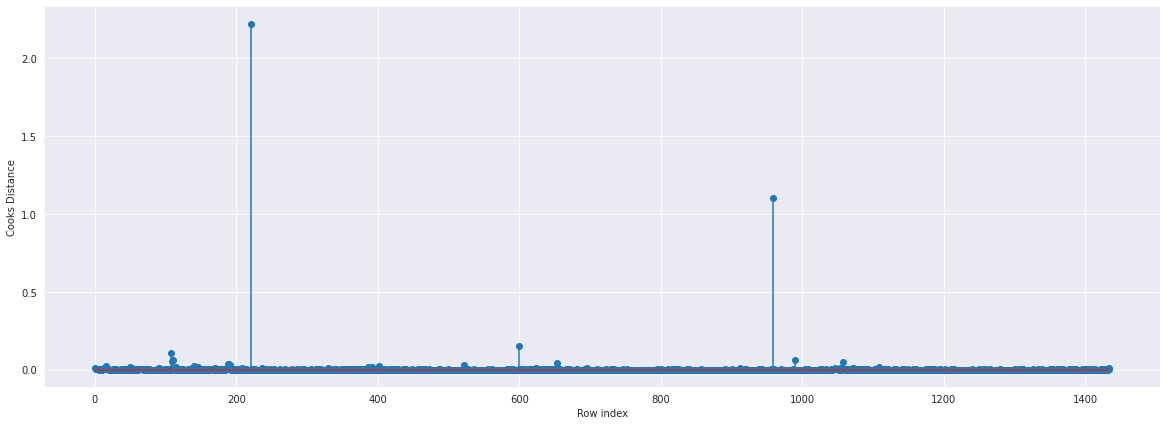

In [171]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Data_2)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');


In [172]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(220, 2.2244611713010634)

In [173]:
#Drop 220 observations
D3=Data_2.drop(Data_2.index[[220]],axis=0)
D3

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [175]:
D4=D3.reset_index()

In [178]:
D5=D4.drop(['index'], axis = 1)

In [179]:
D5

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [180]:
#Build the model on new data
final_ml_P= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=D5).fit()

In [181]:
final_ml_P.rsquared

0.8778445878599779

In [183]:
#Again check for influencers
model_influence_V = final_ml_P.get_influence()
(c_V, _) = model_influence_V.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


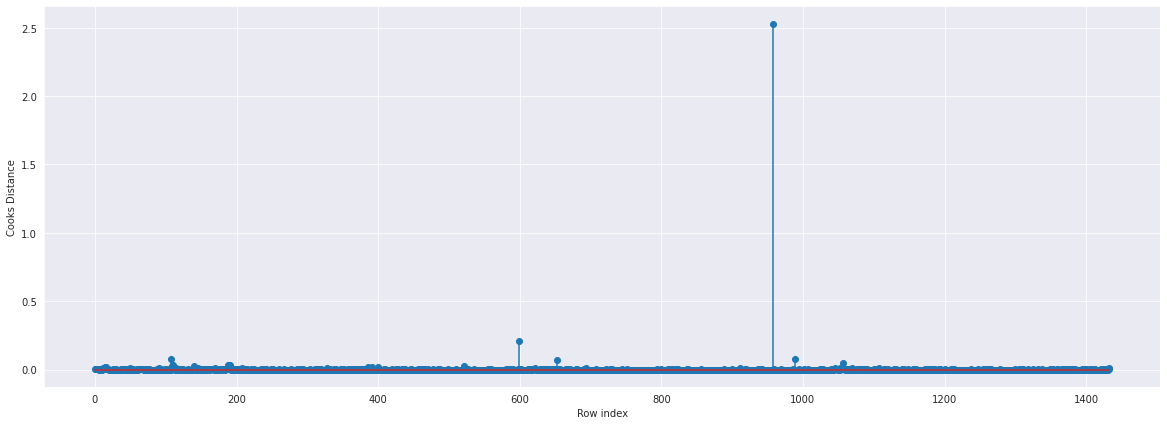

In [184]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(D5)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [185]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(958, 2.531256693023216)

In [186]:
#Drop 958 observation
D6=D5.drop(D5.index[[958]],axis=0)
D6

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [187]:
D7=D6.reset_index()

In [188]:
D8=D7.drop(['index'], axis=1)
D8

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [189]:
#Build the model on new data
final_ml_Prices= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=D8).fit()

In [190]:
final_ml_Prices.rsquared

0.8851845904421739

In [197]:
final_ml_Prices.rsquared , final_ml_Prices.aic
print("Thus model accuracy is improved to",final_ml_Prices.rsquared)

Thus model accuracy is improved to 0.8851845904421739


In [198]:
D8

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


#Model Predictions

In [204]:
# say New data for prediction is
new_data=pd.DataFrame({'Age_08_04':18,"KM":40000,"HP":90,"cc":1400,"Doors":4,"Gears":6,"Quarterly_Tax":70,"Weight":1012},index=[0])
new_data

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,18,40000,90,1400,4,6,70,1012


In [205]:
# Manual Prediction of Price
final_ml_Prices.predict(new_data)

0    14213.993779
dtype: float64

In [206]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_ml_Prices.predict(D8)
pred_y

0       16333.273814
1       15892.326850
2       16310.886081
3       15979.990390
4       15846.536733
            ...     
1428     9115.435074
1429     8499.218117
1430     8644.947302
1431     8758.664462
1432    10641.521002
Length: 1433, dtype: float64